#### 특징공학(숫자)

In [16]:
import sys
sys.maxsize



data = [
    {"price":1200000,"rooms":3,"location":"잠실동"},
    {"price":7000000,"rooms":4,"location":"천호동"},
    {"price":1300000,"rooms":4,"location":"신천동"},
    {"price":4500000,"rooms":2,"location":"천호동"}    
]

In [17]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False,dtype=np.int)
dv.fit_transform(data)

array([[      0,       1,       0, 1200000,       3],
       [      0,       0,       1, 7000000,       4],
       [      1,       0,       0, 1300000,       4],
       [      0,       0,       1, 4500000,       2]])

In [ ]:
# DictVectorizer는 범주형 데이터를 실수화해주는 기능
# (0,1의 형태로 바꿔줌/ 딕셔너리로 숫자를 지정해줄 수 도 있음 [{'A':1,'B':2}]

In [18]:
#OverflowError : Python int too large to convert to C long
#숫자가 너무 크면 뜨는 에러

In [19]:
data = [
    {"price":1200000000,"rooms":3,"location":"잠실동"},
    {"price":7000000000,"rooms":4,"location":"천호동"},
    {"price":1300000000,"rooms":4,"location":"신천동"},
    {"price":4500000000,"rooms":2,"location":"천호동"}    
]

In [21]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False,dtype=np.int64) #int64로 해서 큰 숫자까지 나올 수 있도록 함
dv.fit_transform(data)

array([[         0,          1,          0, 1200000000,          3],
       [         0,          0,          1, 7000000000,          4],
       [         1,          0,          0, 1300000000,          4],
       [         0,          0,          1, 4500000000,          2]],
      dtype=int64)

In [25]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True,dtype=np.int64) #True는 아웃풋을 보여주지 않음
dv.fit_transform(data)   # fit은 데이터 훈련 #transform 데이터 변형

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [26]:
dv.get_feature_names()

['location=신천동', 'location=잠실동', 'location=천호동', 'price', 'rooms']

In [27]:
dir(dv)
#dir은 디렉터리의 파일 및 하위 디렉터리 목록 표시

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_iterable_element',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_transform',
 '_validate_data',
 'dtype',
 'feature_names_',
 'fit',
 'fit_transform',
 'get_feature_names',
 'get_params',
 'inverse_transform',
 'restrict',
 'separator',
 'set_params',
 'sort',
 'sparse',
 'transform',
 'vocabulary_']

#### 텍스트 특징 변환

In [28]:
text = [
    "mobile phone",
    "battlegrounds mobile game",
    "phone game"
]

In [29]:
# mobile phone battlegrounds game
# 4가지 단어 사용

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()  #CountVectorizer는 sparse=False 안 먹음
X = cv.fit_transform(text)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [33]:
import pandas as pd
pd.DataFrame(X.toarray(),columns=cv.get_feature_names())

,battlegrounds,game,mobile,phone
0,0,0,1,1
1,1,1,1,0
2,0,1,0,1


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
X = tv.fit_transform(text)
X

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [36]:
pd.DataFrame(X.toarray(),columns=tv.get_feature_names()) #text가 나오는 빈도수

,battlegrounds,game,mobile,phone
0,0.000000,0.000000,0.707107,0.707107
1,0.680919,0.517856,0.517856,0.000000
2,0.000000,0.707107,0.000000,0.707107


In [37]:
X = np.array([[np.nan,0,3],[3,7,9],[3,5,2],[4,np.nan,6],[8,8,1]])
y = np.array([14,16,-1,8,-5])

In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#from sklearn.preprocessing import Imputer  옛날 버전이라서 에러뜸
#imp = Imputer(strategy='mean')
X2 = imputer.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X2,y)
y_pred = model.predict(X2)
y_pred

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),PolynomialFeatures(degree=2),LinearRegression())

In [50]:
model.fit(X,y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

#### 와인품질

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

redwine = pd.read_csv("C:/Users/687/asi/머신러닝/winequality-red.csv",sep=";",header=0)
redwine["type"] = "red" #columns 추가하는 방법
redwine.head(10) # 몇개 데이터 보여주는지 실행하는 방법

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [155]:
whitewine = pd.read_csv("C:/Users/687/asi/머신러닝/winequality-white.csv",sep=";",header=0)
whitewine["type"] = "white"
whitewine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white


In [156]:
redwine.shape

(1599, 13)

In [157]:
whitewine.shape

(4898, 13)

In [158]:
wine_all = redwine.append(whitewine)
wine_all.shape

(6497, 13)

In [159]:
wine_all.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [67]:
wine_all = pd.DataFrame(data, columns=['type','fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality'])

In [68]:
wine_all.head(10)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
new_col = ['type','fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']
wine_all.columns = new_col

In [78]:
wine_all

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,white
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,white
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,white
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,white


In [160]:
wine_all.columns = wine_all.columns.str.replace(" ","_") #str를 쓰는 이유는 columns가 인덱스 형태여서 replace 안먹힘 그래서 문자 형태로 바꿔줘야함

In [161]:
wine_all.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [162]:
wine_all.head(3000)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,7.3,0.18,0.29,1.2,0.044,12.0,143.0,0.9918,3.20,0.48,11.3,7,white
1397,7.3,0.25,0.36,13.1,0.050,35.0,200.0,0.9986,3.04,0.46,8.9,7,white
1398,7.3,0.25,0.36,13.1,0.050,35.0,200.0,0.9986,3.04,0.46,8.9,7,white
1399,7.0,0.20,0.34,5.7,0.035,32.0,83.0,0.9928,3.19,0.46,11.5,6,white


In [163]:
wine_all.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [164]:
wine_all.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [165]:
wine_all.quality.unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [166]:
wine_all.quality.unique().sort

<function ndarray.sort>

In [167]:
wine_all.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [168]:
sorted(wine_all.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [169]:
wine_all.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [170]:
wine_all.groupby('type')['quality'].quantile([0,0.25,0.5,0.75,1]).unstack('type')

type,red,white
0.00,3.0,3.0
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0
1.00,8.0,9.0


In [171]:
w=wine_all.groupby(['type','quality'])

In [114]:
w

In [151]:
wine_all[wine_all["type"]=="red"]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [152]:
wine_all.loc[wine_all["type"]=="red","quality"]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

C:\Users\687\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


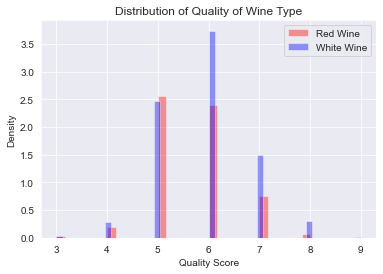

In [172]:
import seaborn as sns

red_q = wine_all.loc[wine_all["type"] == "red","quality"]
white_q = wine_all.loc[wine_all["type"] == "white","quality"]

sns.set_style('darkgrid')
sns.distplot(red_q, norm_hist=True, kde=False, color='red', label='Red Wine')
sns.distplot(white_q, norm_hist=True, kde=False, color='blue', label='White Wine')
plt.title('Distribution of Quality of Wine Type')
plt.xlabel('Quality Score')
plt.ylabel('Density')
plt.legend()

In [133]:
wine_all.groupby("type")["quality"].aggregate(["std","mean"])

,std,mean
type,,
red,0.807569,5.636023
white,0.807569,5.636023


In [134]:
!pip install statsmodels


In [174]:
import statsmodels.api as sm

t_stat, p_value, df = sm.stats.ttest_ind(red_q, white_q)
"t-test: {:.3f}, p-value : {:.4f}".format(t_stat,p_value)  #두개의 데이터 값이 같으면 p값=1, t-test=0

't-test: -9.686, p-value : 0.0000'

In [175]:
wine = wine_all.corr()

In [176]:
wine.loc[wine["quality"]>0,"quality"]

citric_acid            0.085532
free_sulfur_dioxide    0.055463
pH                     0.019506
sulphates              0.038485
alcohol                0.444319
quality                1.000000
Name: quality, dtype: float64

In [140]:
wine.loc[wine["quality"]<0,"quality"]

volatile_acidity       -0.390558
chlorides              -0.128907
free_sulfur_dioxide    -0.050656
total_sulfur_dioxide   -0.185100
density                -0.174919
pH                     -0.057731
Name: quality, dtype: float64

In [177]:
red_sample  =wine_all.loc[wine_all["type"]=="red", :]
white_sample  =wine_all.loc[wine_all["type"]=="white", :]

In [178]:
red_idx = np.random.choice(red_sample.index, replace=True, size=200)  #red index 200개만 랜덤으로 가져와서 추출
white_idx = np.random.choice(white_sample.index, replace=True, size=200)

In [179]:
wine_sample = red_sample.loc[red_idx, ].append(white_sample.loc[white_idx, ])
wine_sample.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
1227,9.0,0.58,0.25,2.00,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5,red
1532,7.2,0.53,0.13,2.00,0.058,18.0,22.0,0.99573,3.21,0.68,9.9,6,red
1006,9.1,0.29,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7,red
28,7.1,0.71,0.00,1.90,0.080,14.0,35.0,0.99720,3.47,0.55,9.4,5,red
1467,6.7,1.04,0.08,2.30,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,red


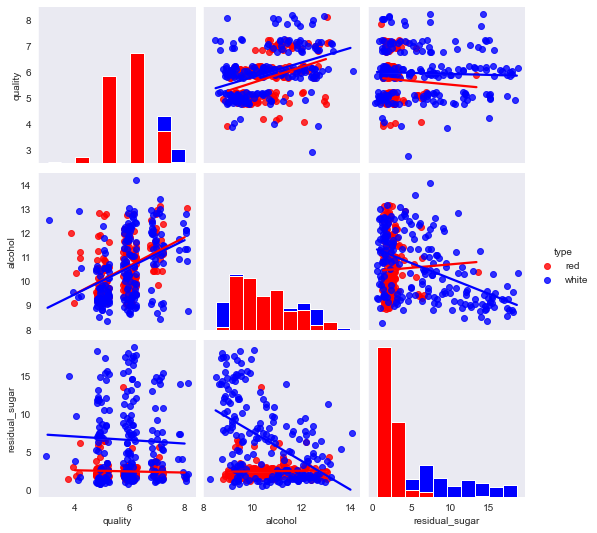

In [180]:
sns.set_style("dark")
sns.pairplot(wine_sample, vars=["quality","alcohol","residual_sugar"],kind="reg",plot_kws={"ci":False, "x_jitter":0.25, "y_jitter":0.25},diag_kind="hist",diag_kws={"bins":10,"alpha":1},hue="type",palette=dict(red="red",white="blue",markers=["o","s"]))

In [147]:
wine_all.loc[wine_all["type"]=="red", :].head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


In [148]:
wine_all[wine_all["type"]=="red"].head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


#### 와인데이터 머신러닝

In [184]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) #fit_intercept=True 절편 사용여부 나타내기
model
# n_jobs': None 동시에 몇개 돌릴꺼냐


LinearRegression()

In [182]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [186]:
wine_all.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


In [187]:
X = wine_all.drop(["type","quality"],axis=1)
X.shape

(6497, 11)

In [188]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [189]:
y = wine_all.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64

In [190]:
y.shape

(6497,)

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1) #X,y train으로 훈련을 시키고 X,ytest에 테스트 해보고 결과예측
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((4872, 11), (1625, 11), (4872,), (1625,))

In [192]:
model.fit(X_train,y_train)

LinearRegression()

In [193]:
model = LinearRegression(fit_intercept=True, n_jobs=None, normalize=True)

In [194]:
model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [195]:
print("coef = ",model.coef_)
print("-"*30)
print("intercept = ",model.intercept_)

coef =  [ 5.55618691e-02 -1.29945358e+00 -1.08205046e-01  4.52070539e-02
 -3.95901596e-01  5.76479819e-03 -2.47760359e-03 -5.30023471e+01
  3.50283862e-01  7.49149475e-01  2.78530060e-01]
------------------------------
intercept =  54.05800385466537


In [199]:
from sklearn.ensemble import RandomForestClassifier

new_data = np.array([6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5])
model.predict(np.reshape(new_data,(1,11)))

array([5.27273597])

In [200]:
y_pred = model.predict(X_test)
y_pred.shape

(1625,)

#### 모델성능측정

In [201]:
def rmse(y_real,y_pred):
    return np.sqrt(np.mean((y_real-y_pred)**2))

In [202]:
np.round(rmse(y_test,y_pred),2)

0.73

In [203]:
from sklearn.metrics import mean_squared_error

np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)

0.73

### 규제가 있는 선형 모델
#### 1. 규제가 없는 선형모델의 적합

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1) #X,y train으로 훈련을 시키고 X,ytest에 테스트 해보고 결과예측
#X_train.shape,X_test.shape, y_train.shape,y_test.shape

model = LinearRegression(fit_intercept=True, n_jobs=None, normalize=True)
model.fit(X_train,y_train)
print("coef = ",model.coef_)
print("-"*30)
print("intercept = ",model.intercept_)
y_pred = model.predict(X_test)

np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)

#### 2. 규제가 있는 선형모델의 적합
##### - 리지(ridge)
##### - 라쏘(lasso)
##### - 엘라스틱 넷


In [205]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.05)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test,y_pred)),3)

0.727

In [206]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.05)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test,y_pred)),3)

0.761

#### K-최근접 이웃

In [209]:
breast_cancer=pd.read_csv("C:/Users/687/asi/머신러닝/breast-cancer-wisconsin.data",header=None)
breast_cancer.head()


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [210]:
breast_cancer.columns = ["id","clump","size","shape","marg","epith","bare","bland","normal","mitoses","class"]

In [211]:
breast_cancer.head()

,id,clump,size,shape,marg,epith,bare,bland,normal,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [212]:
breast_cancer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       699 non-null    int64 
 1   clump    699 non-null    int64 
 2   size     699 non-null    int64 
 3   shape    699 non-null    int64 
 4   marg     699 non-null    int64 
 5   epith    699 non-null    int64 
 6   bare     699 non-null    object
 7   bland    699 non-null    int64 
 8   normal   699 non-null    int64 
 9   mitoses  699 non-null    int64 
 10  class    699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [213]:
breast_cancer.isnull().values.sum()

0

In [214]:
breast_cancer['bare'] = breast_cancer['bare'].replace('?',np.NAN)

In [215]:
breast_cancer['bare'] = \ # \의 뜻은 앞문장과 뒷문장이 이어진다는 뜻
breast_cancer['bare'].fillna(breast_cancer['bare'].value_counts().index[0])

In [216]:
breast_cancer['cancer_ind']=0
breast_cancer.loc[breast_cancer['class']==4,'cancer_ind']=1

In [217]:
breast_cancer.head(10)

,id,clump,size,shape,marg,epith,bare,bland,normal,mitoses,class,cancer_ind
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
5,1017122,8,10,10,8,7,10,9,7,1,4,1
6,1018099,1,1,1,1,2,10,3,1,1,2,0
7,1018561,2,1,2,1,2,1,3,1,1,2,0
8,1033078,2,1,1,1,2,1,1,1,5,2,0
9,1033078,4,2,1,1,2,1,2,1,1,2,0


In [218]:
X = breast_cancer.drop(["id","class","cancer_ind"],axis=1)
y = breast_cancer.cancer_ind

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [221]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
# 데이터 표준화작업

In [222]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [223]:
from sklearn.neighbors import KNeighborsClassifier

In [224]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [226]:
knn.get_params() #알고리즘을 지정하지 않아서 auto로 됨
# 각 파라미터를 바꾸면서 조정을 해보는 방법을 알아보자!

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [227]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
y_pred = knn.predict(X_test_scaled)


In [228]:
accuracy_score(y_test,y_pred)

0.9761904761904762

In [229]:
confusion_matrix(y_test,y_pred)

array([[141,   2],
       [  3,  64]], dtype=int64)

In [230]:
roc_auc_score(y_test,y_pred)

0.9706189333055005

In [232]:
(141+64)/(141+2+3+64)  # confusion metrics 에서 정확도(accuracy) 측정한 값= (TP+TN)/전체데이터 수 

0.9761904761904762

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
grid_search = GridSearchCV(knn, {"n_neighbors":[1,2,3,4,5]},n_jobs=-1,cv=7,scoring="roc_auc" )
# n_jobs=-1은 최적의 값을 알아서 처리해줘라라는 뜻

In [235]:
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]}, scoring='roc_auc')

In [236]:
grid_search.best_params_

{'n_neighbors': 5}

In [238]:
knn_best=grid_search.best_estimator_

In [239]:
y_pred=knn_best.predict(X_test_scaled)

In [240]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [241]:
confusion_matrix(y_test,y_pred)

array([[141,   2],
       [  5,  62]], dtype=int64)

In [242]:
roc_auc_score(y_test,y_pred)

0.9556935601711722